# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

**Mounting the Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading the required libraries**

In [2]:
!pip install keras-tuner
# Libraries to help with reading and manipulating data
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import keras_tuner
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV
# importing roc_curve to plot
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# importing SMOTE
from imblearn.over_sampling import SMOTE
# importing metrics
from sklearn import metrics
import random
#Importing classback API
from keras import callbacks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.2 MB/s eta 0:00:00


<ipython-input-2-3a28b1caa454>:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


## Loading the dataset

In [3]:
data = pd.read_csv("/content/drive/MyDrive/01 Texas Program/05 Introduction to Neural Networks/Project/Churn.csv")

## Data Overview

- Observations
- Sanity checks

In [4]:
# Checking the number of rows and columns in the data
data.shape

(10000, 14)

* The dataset has 10000 rows and 14 columns

In [5]:
# let's create a copy of the data
df = data.copy()

In [6]:
# let's view the first 5 rows of the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# let's view the last 5 rows of the data
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Checking the data types of the columns for the dataset

In [8]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* 3 variables are object rest all are numerical types.
* All columns have 10000 values.

Lets check the missing values

In [9]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* There are no missing values in the dataset

Lets convert the columns with an 'object' datatype into categorical variables

In [10]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [11]:
# let's check the data types of the columns in the dataset after the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  category
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  int64   
 11  IsActiveMember   10000 non-null  int64   
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  int64   
dtypes: category(3), float64(2), int64(9)
memory usage: 986.3 KB


### Checking for duplicate values

In [12]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

* There are not duplicate data

### Checking null values

In [13]:
#finding the null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* There are not null values in the data

**Let's check the number of unique values in each column**

In [14]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


**Data Cleaning**
* Let's drop CustomerID, RowNumbe and Surname columns

In [15]:
# Unique values are drop
df.drop(["CustomerId","RowNumber","Surname"], axis=1, inplace=True)

### Statistical summary of the dataset

In [16]:
# let's view the statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


- ClientId is a unique ID, hence it is a variable that can be drop
- CreditScore: The minimum credit score is 350, the maximum is 850. The mean is 650
- Age: The minimum age is 18, the maximum is 92. The mean is 39.
- Tenure: The minimum tenure is 0 years and the maximum 10. The mean is 5.
- Balance: The minimum account balance is 0, the maximum is 250,898. The mean is 76,486.
- NumofProducts: The minimum number of products that the customers have with the bank is 1 and the maximum is4. The mean is 1.53.
- HasCrCard: This is a boolean variable. It can be converted into a categorical variable. It will be analyzed later.
- IsActiveMember: This is a boolean variable. It can be converted into a categorical variable. It will be analyzed later.
- EstimatedSalary: The minimum estimated salary is 11.58 and the maximum is 199,992. This variable need to ne analyzed later.
- Exited: This is the target variable.

In [17]:
# let's view the statistical summary of the categorical columns in the data
df.describe(include=["category"]).T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [18]:
# list of all categorical variables
cat_col = [
    "Geography",
    "Gender",
    ]

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)


France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64
--------------------------------------------------
Male      0.5457
Female    0.4543
Name: Gender, dtype: float64
--------------------------------------------------


- Surname: There are 2932 unique values. Smith is the mode and it is repeated 32 times in the dataset.
- Geography: 50.14% of the customers are from France, 25.09% from Germany and 24.77% from Spain.
- Gender: There are two genders in the dataset. 54.57% are male and 45.43% are female.


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [21]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [22]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [23]:
def outliers(data, feature):
  Q1 = data[feature].quantile(0.25)  # To find the 25th percentile
  Q3 = data[feature].quantile(0.75)  # To find the 75th percentile

  IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
  lower = (Q1 - 1.5 * IQR)
  upper = (Q3 + 1.5 * IQR)
  print("lower ",lower)
  print("upper ",upper)

### Univariate analysis

### Observations on Geography (Category)

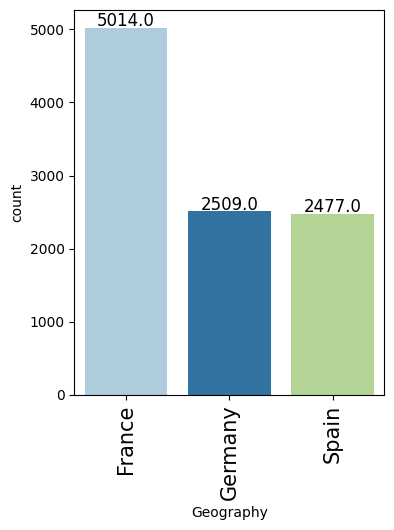

In [24]:
labeled_barplot(df, "Geography")

- Geography: 50.14% of the customers are from France, 25.09% from Germany and 24.77% from Spain.

### Observations on Gender (Category)

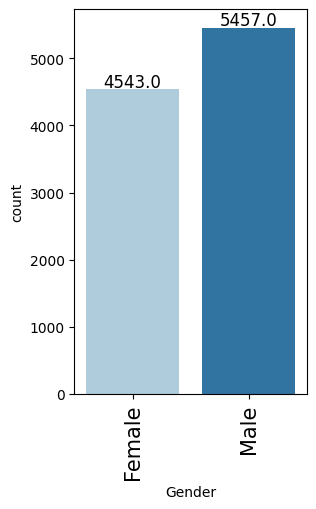

In [25]:
labeled_barplot(df, "Gender")

- Gender: There are two genders in the dataset. 54.57% are male and 45.43% are female.

### Observations on HasCrCard (Boolean)

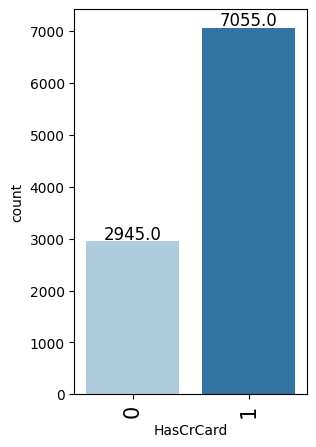

In [26]:
labeled_barplot(df, "HasCrCard")

- HasCrCard: 70.55% of the customers has a Credit Card, the remaining 29.45% do not have credit card.

### Observations on IsActiveMember (Boolean)

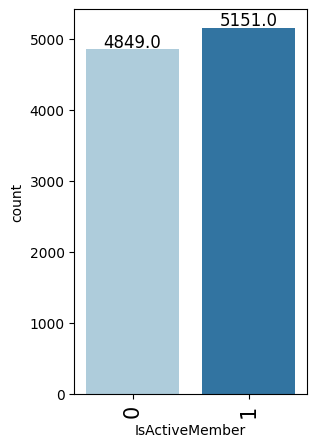

In [27]:
labeled_barplot(df, "IsActiveMember")

- IsActiveMember: 51.51% of the customers are active (using banks products regularly, making transactions, etc.), the remaining 48.49% are not active.

### Observations on Exited (Boolean)

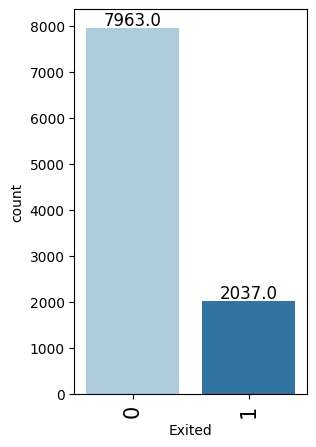

In [28]:
labeled_barplot(df, "Exited")

- Exited: 20.37% of the customers left the bank in the last six months, the remaining 79.63% are still with the bank.

### Observations on CreditScore (Numerical)

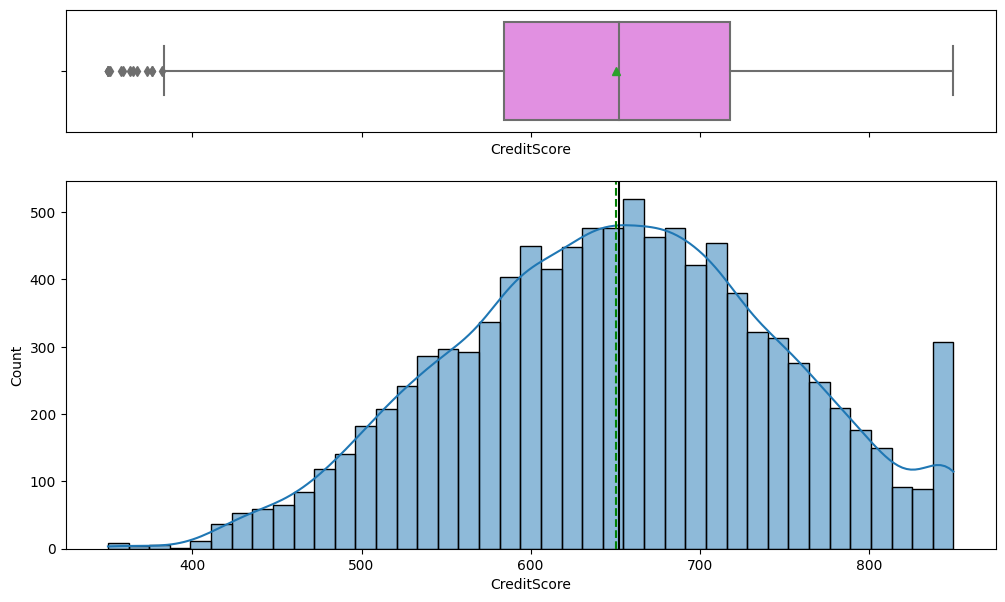

In [29]:
histogram_boxplot(df, "CreditScore", kde=True)

In [30]:
outliers(df, "CreditScore")

lower  383.0
upper  919.0


- The distribution is left-skewed.
- The boxplot shows that there are outliers at the left.
- These outliers are no going to be treated as they represent real data.
- There are around 300 customers with the highest credit score .


### Observations on Age (Numerical)

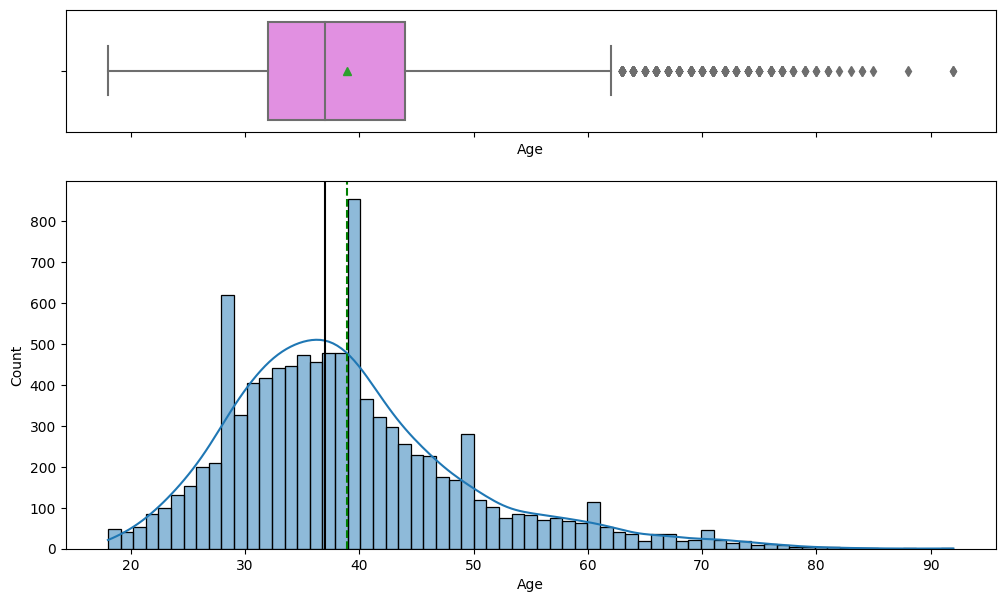

In [31]:
histogram_boxplot(df, "Age", kde=True)

In [32]:
outliers(df, "Age")

lower  14.0
upper  62.0


- The distribution is right-skewed.
- The boxplot shows that there are outliers at the right, customers with age more than 62 years old are considered outliers.
- These outliers are no going to be treated as they represent real data.
- There are an important number of customer around 28 years old (around 600) and an important number of customers around 40 years old (around 800).

### Observations on Tenure (Numerical)

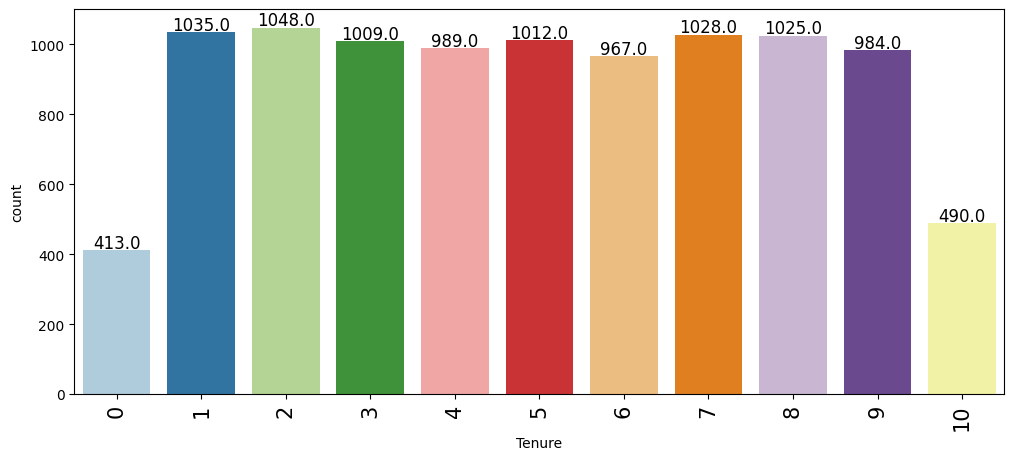

In [33]:
labeled_barplot(df, "Tenure")

- 413 customers have a tenure of less than one year.
- 490 customers boast a decade-long tenure.
- The remaining customers are distributed fairly evenly across the 1 to 9 years tenure.


### Observations on NumOfProducts (Numerical)

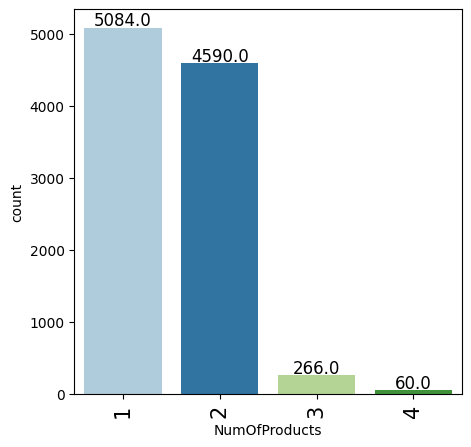

In [34]:
labeled_barplot(df, "NumOfProducts")

- 50.84% of the customers have only one product with the bank.
- 45.90% of the customers have two products with the bank.
- 2.66% of the customers have three products with the bank.
- 0.60% of the customers have four products with the bank.


### Observations on EstimatedSalary (Numerical)

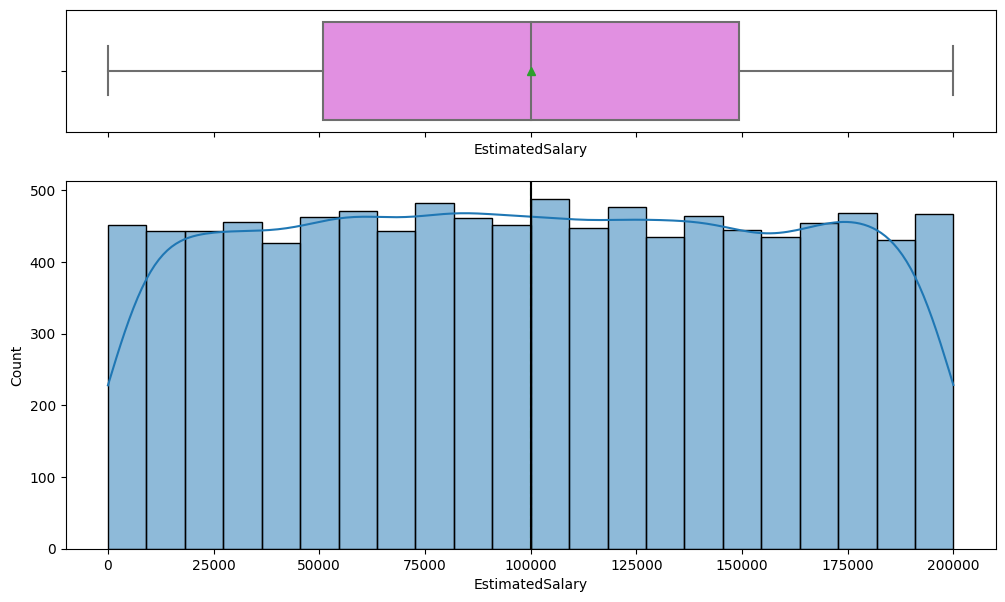

In [35]:
histogram_boxplot(df, "EstimatedSalary", kde=True)

- The estimated salary of the customers are distributed fairly evenly across the 11.6 to 200.000.

### Observations on Balance (Numerical)

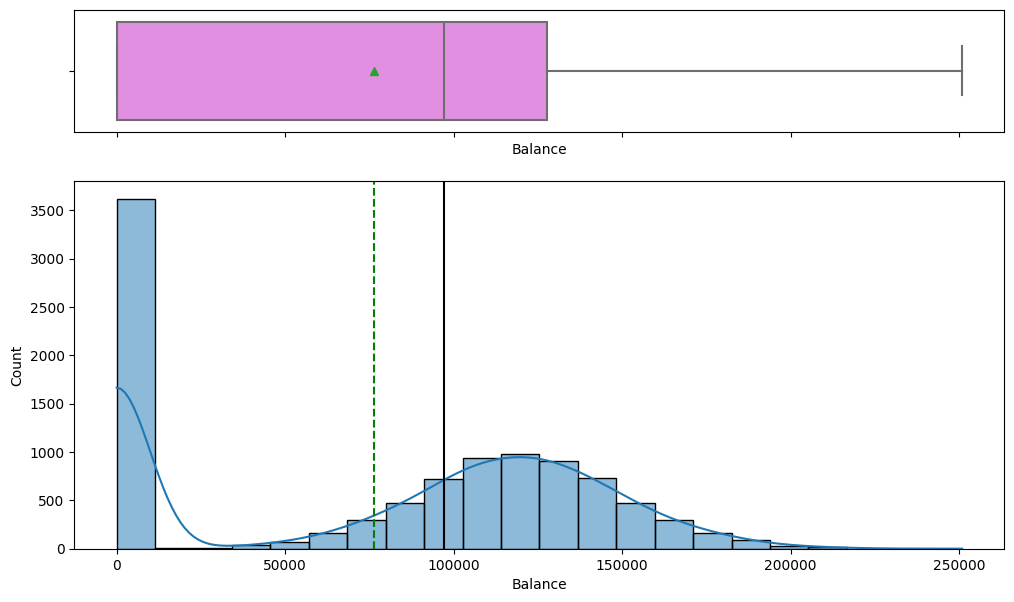

In [36]:
histogram_boxplot(df, "Balance", kde=True)

- Around 3500 (35%) customers maintain a zero balance in their accounts. 2037 customers are those who closed the account.
- The remaining customers exhibit a normal distrubution, with a mean value approximately 125000 (read from plot)

### Bivariate Analysis

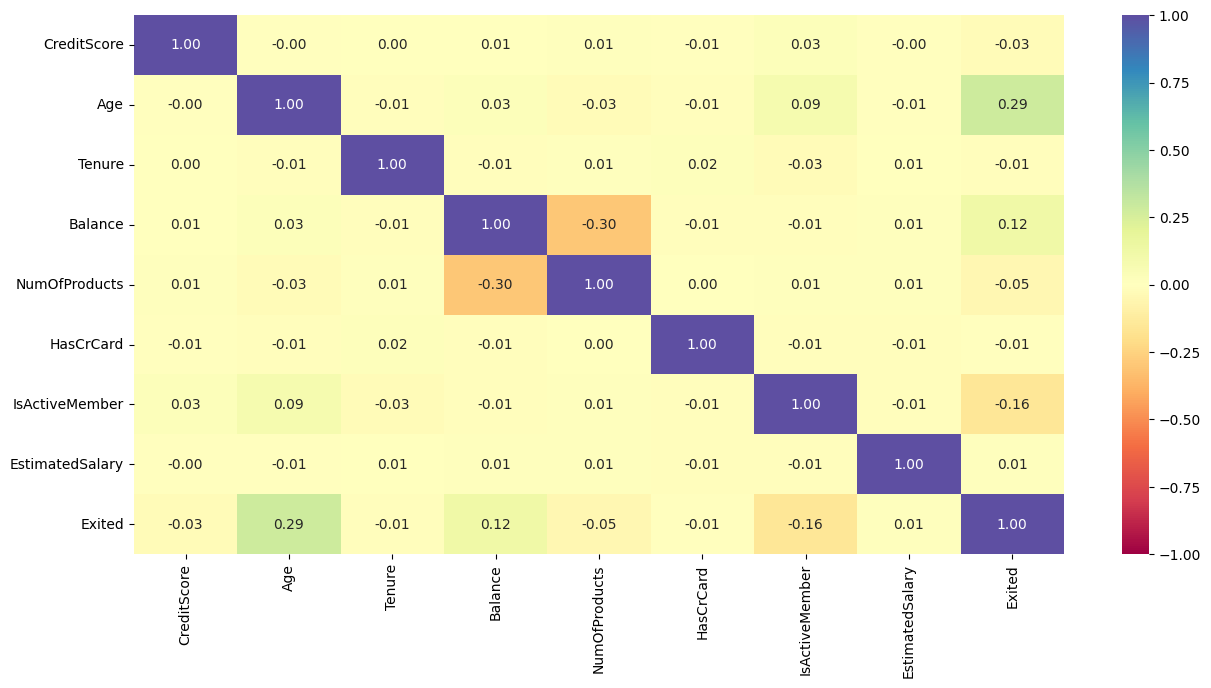

In [37]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

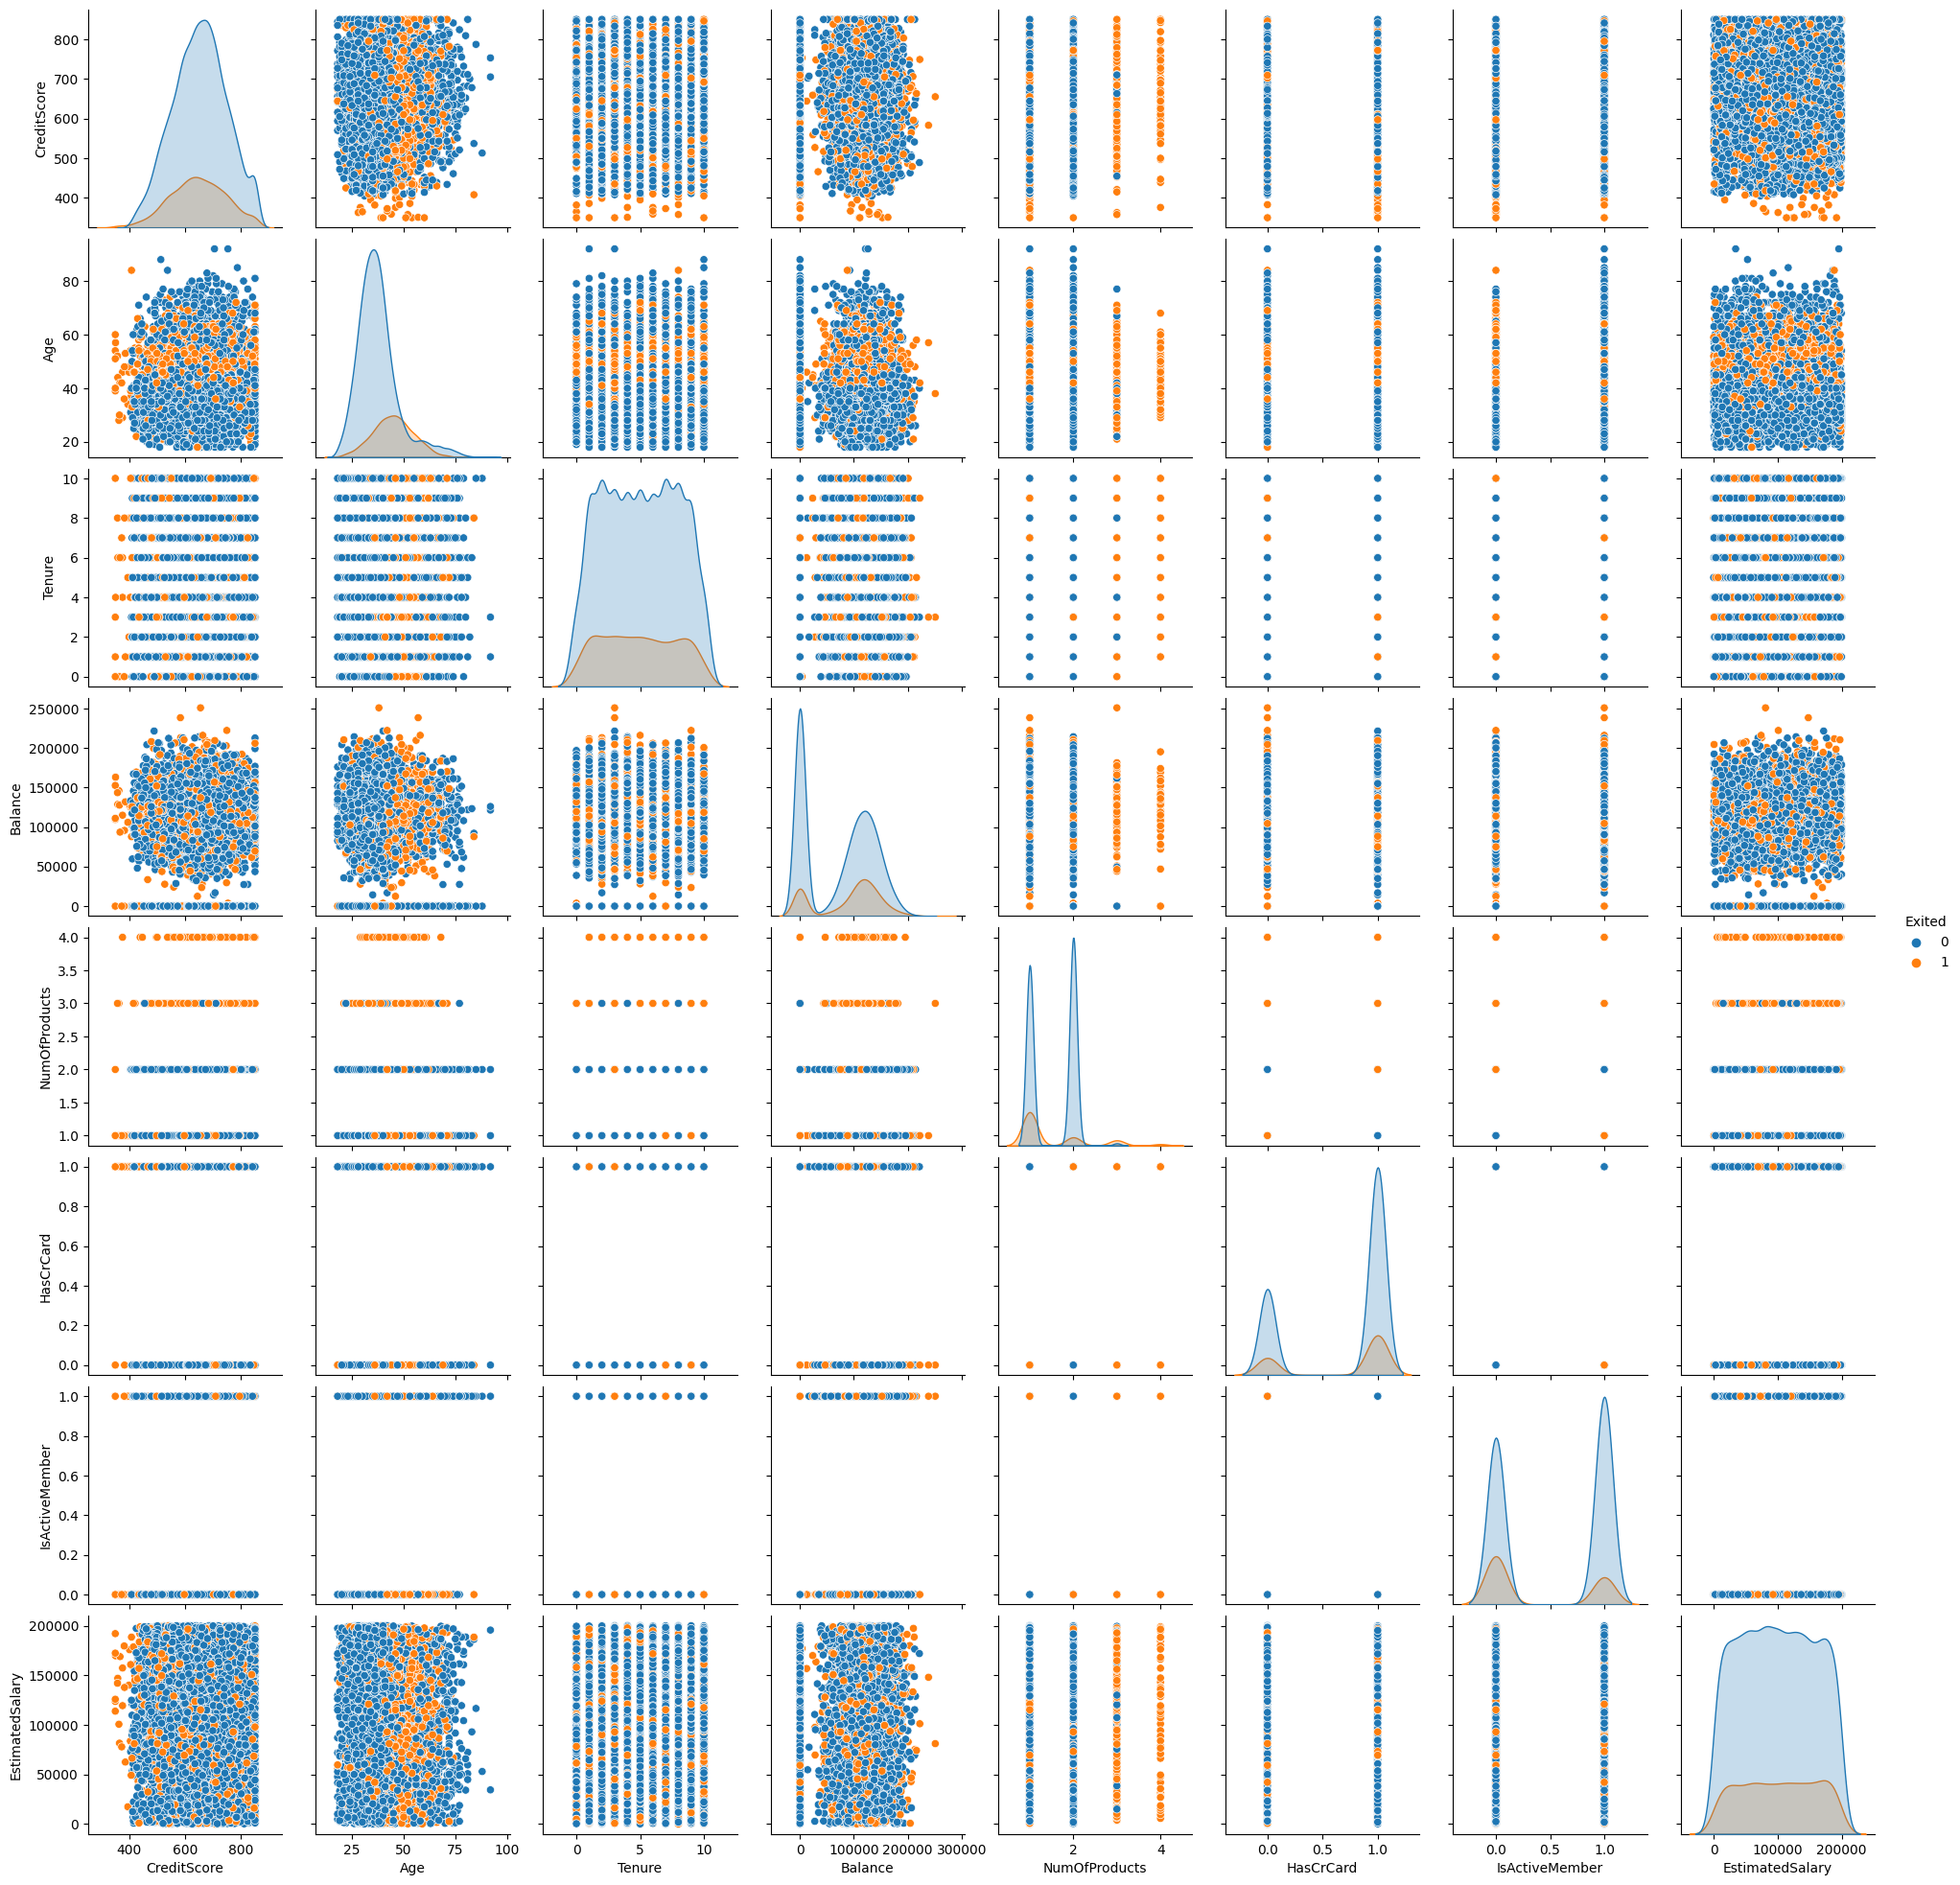

In [38]:
sns.pairplot(data=df, diag_kind="kde", hue="Exited")
plt.show()

**Bivariate Analysis**

* For most of the variables there is no strong correlation either with the Exited or between any independent variable.
* Seems that there is a correlation between NumOfProducts and Exited.

**Exited vs CreditScore**

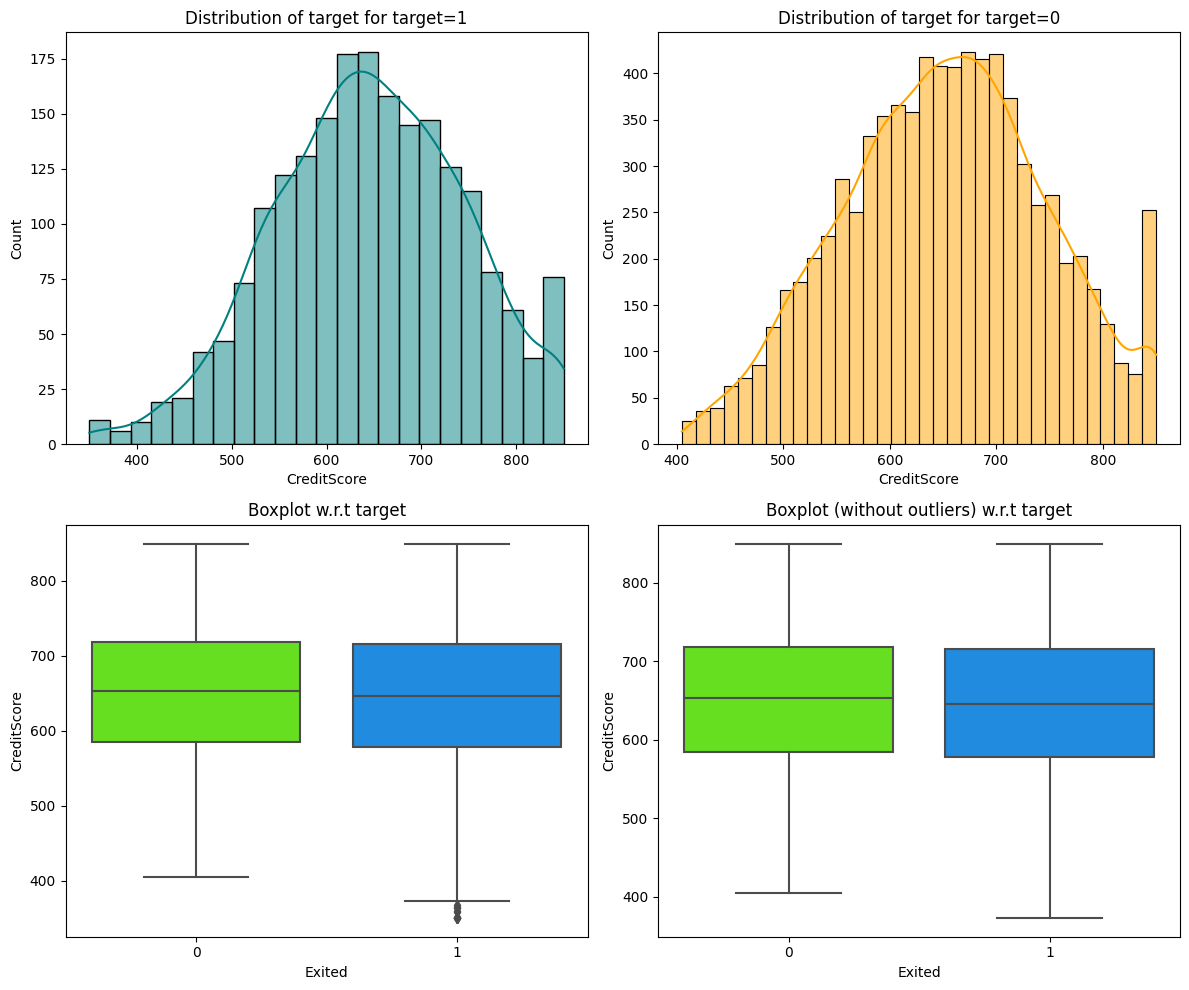

In [39]:
distribution_plot_wrt_target(df, "CreditScore", "Exited")

* CreditScore does't seem to have any impact on the Exited variable.

**Exited vs Geography**

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


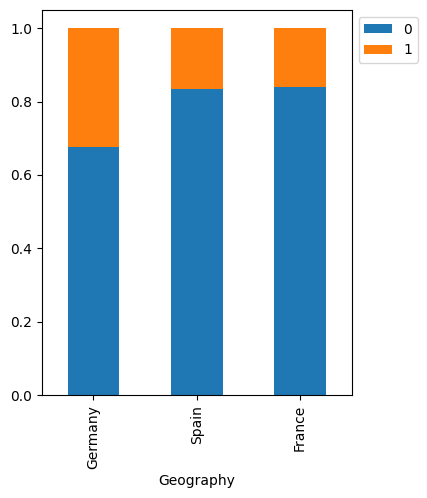

In [40]:
stacked_barplot(df, "Geography", "Exited")

* It appears that customers from Germany are more prone to leaving the bank compared to customers from the other two nationalities, Spain and France.

**Exited vs Gender**

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


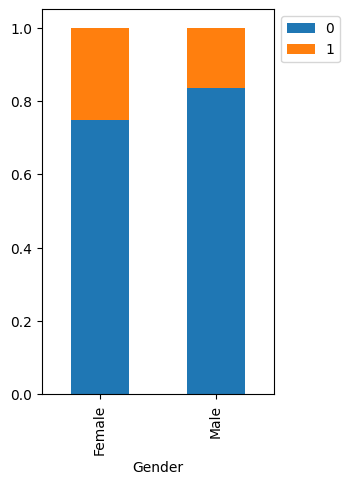

In [41]:
stacked_barplot(df, "Gender", "Exited")

* It appears that female customers are more prone to leaving the bank compared to male customers.

**Exited vs Age**

Exited     0     1    All
Age                      
All     7963  2037  10000
46       135    91    226
40       343    89    432
43       209    88    297
45       142    87    229
..       ...   ...    ...
79         4     0      4
78         5     0      5
77        10     0     10
76        11     0     11
75         9     0      9

[71 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


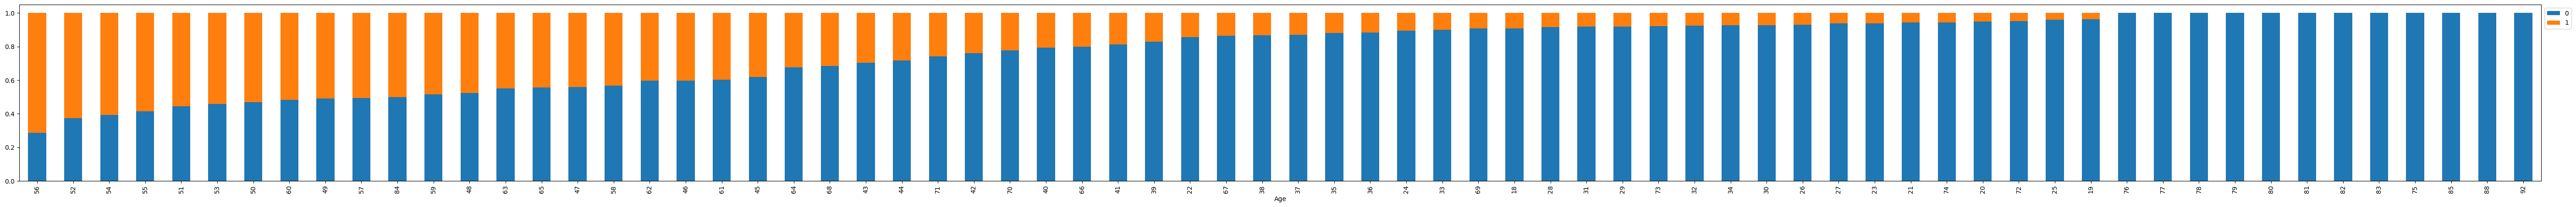

In [42]:
stacked_barplot(df, "Age", "Exited")

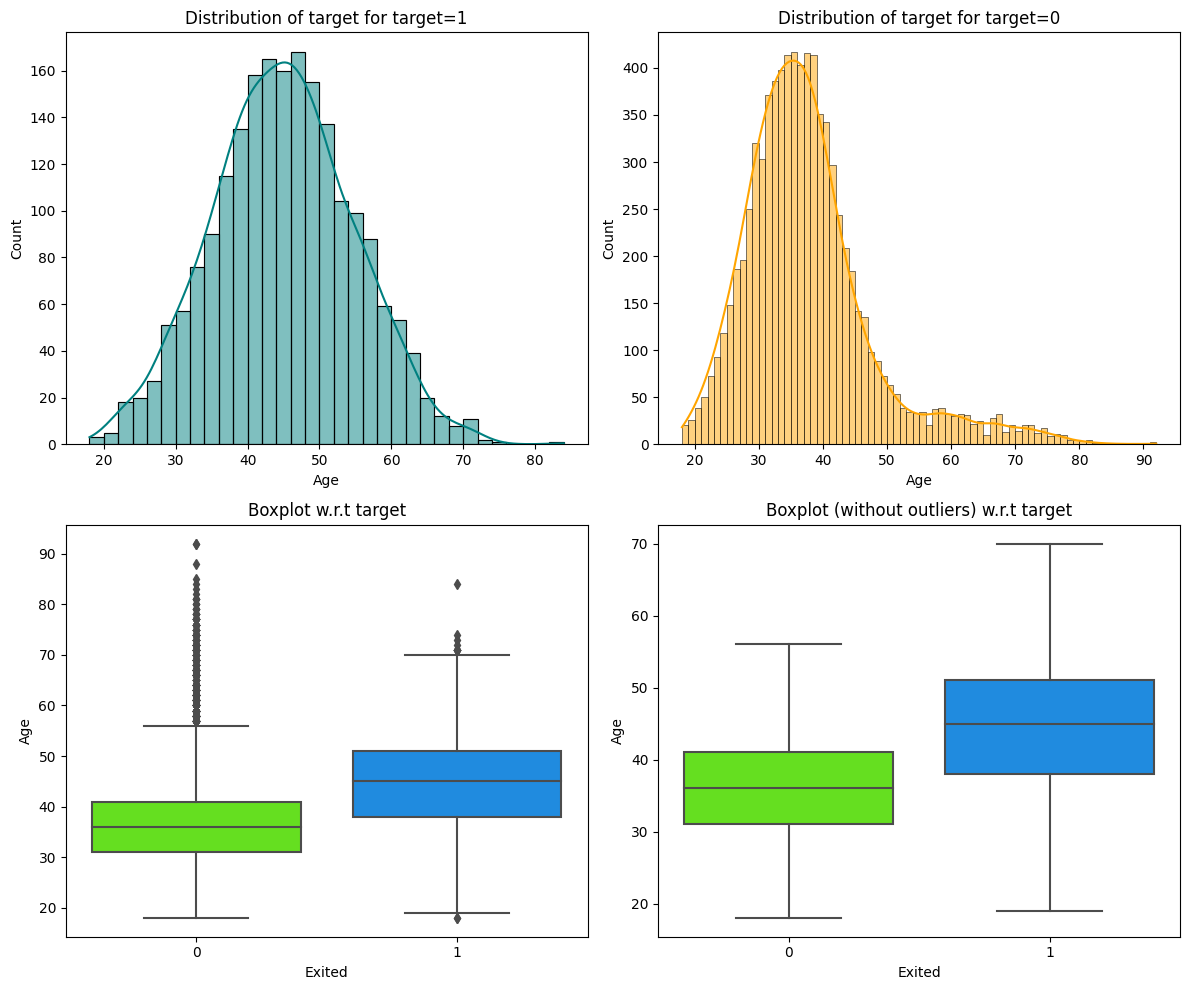

In [43]:
distribution_plot_wrt_target(df, "Age", "Exited")

* It seems that customers aged between 40 and 50 are more likely to leave the bank.
* Meanwhile, customers aged between 30 and 40 are inclined to stay, much like those who are over 70 years old.

**Exited vs Tenure**

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


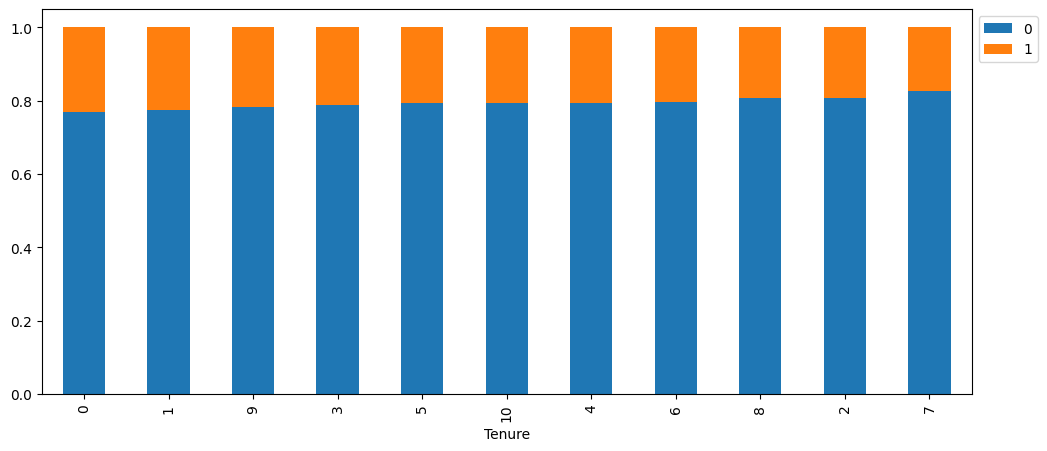

In [44]:
stacked_barplot(df, "Tenure", "Exited")

* Tenure variable does't seem to have any impact on the Exited variable.

**Exited vs NumOfProducts**

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


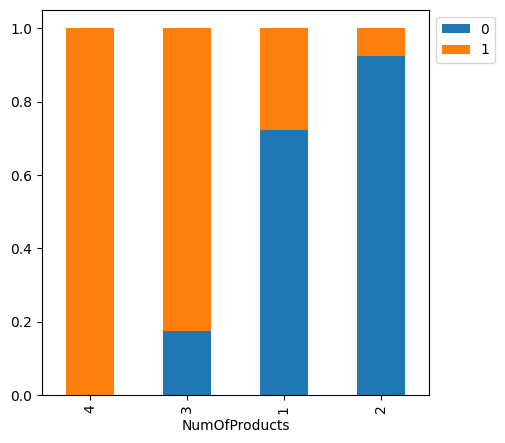

In [45]:
stacked_barplot(df, "NumOfProducts", "Exited")

* The NumOfProducts variable apperars to exert a significant influence on the Exited variable.
* Customers with four products at the bank have shown a tendency to leave.
* Aproximately 80% of customers with 3 products have left the bank.
* Less that 10% of customers whit just 1 product at the bank have chosen to leave.

**Exited vs Balance**

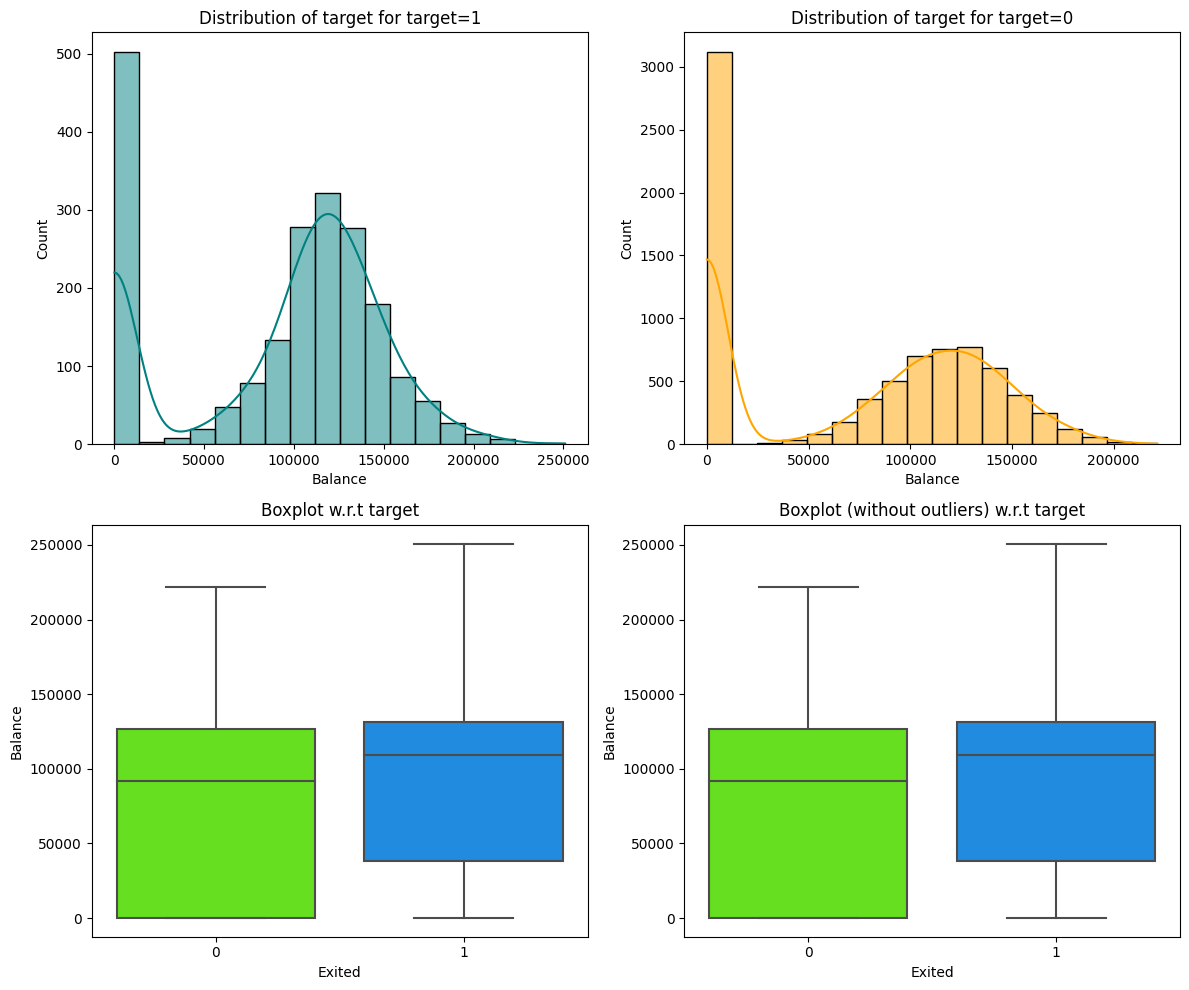

In [46]:
distribution_plot_wrt_target(df, "Balance", "Exited")

* Balance does't seem to have any impact on the Exited variable.

**Exited vs HasCrCard**

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


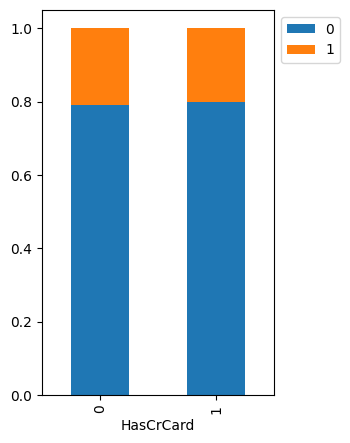

In [47]:
stacked_barplot(df, "HasCrCard", "Exited")

* HasCrCard does't seem to have any impact on the Exited variable.

**Exited vs EstimatedSalary**

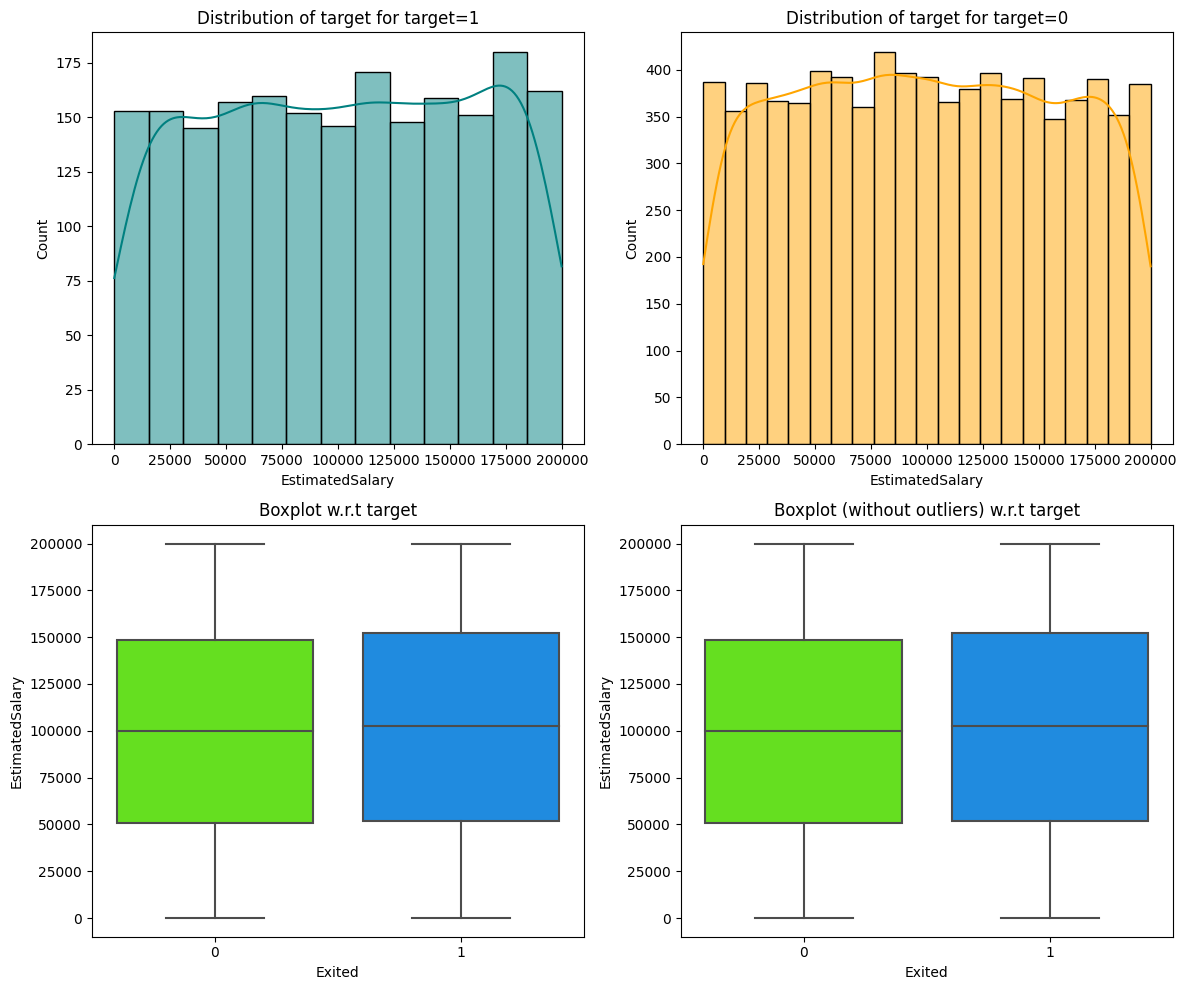

In [48]:
distribution_plot_wrt_target(df, "EstimatedSalary", "Exited")

* EstimatedSalary does't seem to have any impact on the Exited variable.

**Exited vs isActiveMember**

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


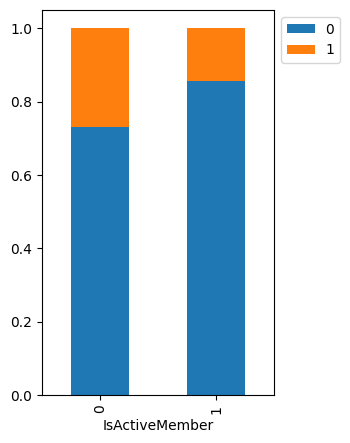

In [49]:
stacked_barplot(df, "IsActiveMember", "Exited")

* It seems that non active customers are more likely to leave the bank.

**Reply to questions**
1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
- The distribution is left-skewed.
- The boxplot shows that there are outliers at the left.
- These outliers are no going to be treated as they represent real data.
- There are around 300 customers with the highest credit score .
2. How many active members are there with the bank?
- 5151 (51.51%) of the customers are active (using banks products regularly, making transactions, etc.), the remaining 4849 (48.49%) are not active.
3. How are the different customer attributes correlated to each other?
* For most of the variables there is no strong correlation either with the Exited or between any independent variable.
* Seems that there is a correlation between NumOfProducts and Exited.
4. Who is churning more when compared to males and females?  
* It appears that female customers are more prone to leaving the bank compared to male customers.
5. Customers from which geographical part are churning more?
* It appears that customers from Germany are more prone to leaving the bank compared to customers from the other two nationalities, Spain and France.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

**Split the data in train, validation and test data**

In [50]:
# creating the copy of the dataframe
df1 = df.copy()

In [51]:
## Storing required categorical variables in cat_dat to apply dummification
cat_data = ["Gender",'Geography']

In [52]:
X = df1.drop(["Exited"], axis=1)
y = df1["Exited"]

print(X.shape)
print(y.shape)
print(type(X))

(10000, 10)
(10000,)
<class 'pandas.core.frame.DataFrame'>


In [53]:
y.unique()

array([1, 0])

In [54]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, shuffle=True
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, shuffle=True
)
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 10) (2000, 10) (2000, 10)


In [55]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4495,789,France,Female,32,7,69423.52,1,1,0,107499.39
6470,583,Germany,Female,41,5,77647.60,1,1,0,190429.52
2221,767,Germany,Female,35,6,132253.22,1,1,0,115566.57
7686,718,France,Male,48,9,0.00,2,1,1,72105.63
9419,686,Germany,Male,26,1,57422.62,1,1,1,79189.40


**Normalizing**

The numerical columns present in this dataset are having different units (Years, Money, Score), so scaling would help them all be in the same range.

In [56]:
## Scaling the data
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

This is a classification problem, there is no need of scaling the target variable.

**Categorical Encoding**

In [57]:
# Using pd.get dummies to encode the categorical columns in the data
X_train = pd.get_dummies(X_train,columns=cat_data,drop_first= True)
X_test = pd.get_dummies(X_test,columns=cat_data,drop_first= True)
X_val = pd.get_dummies(X_val,columns=cat_data,drop_first= True)

In [58]:
# Checking the shape
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(6000, 11)
(2000, 11)
(6000,)
(2000,)
(2000, 11)
(2000,)


## Model Building

### Model Evaluation Criterion

### Model can make wrong predictions as:
1. Predicting a customer will close the account and the customer doesn't close the account
2. Predicting a customer will not close the account and the customer close the account

### Which case is more important?
* Predicting that customer will not close the account (not Exited) but he close the account (Exited) i.e. losing on a valuable customer.

### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can provide incentives to retain their customers.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [59]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)


    if title:
        plt.title(title)

### Model Building: Neural Network

- We will now start with the model building process.
- We will create a model.
 - One hidden layer with ReLU as activation function.
 - Output layer with 1 nodes (For binary classification problem) and Sigmoid Activation Function

**Early stopping:**

In case of overfitting the early stopping function will be added.
During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped after the certian interations.The model at the time that training is stopped is then used and is known to have good generalization performance.

This procedure is called “early stopping” and is perhaps one of the oldest and most widely used forms of neural network regularization.

In [60]:
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

#### Model-1 SGD (Stochastic Gradient Descent) as optimizer

In [61]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [62]:
# Initializing the ANN
model_SGD = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model_SGD.add(Dense(activation = 'relu', input_dim = 11, units=64))
#Add 1st hidden layer
model_SGD.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim.
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model_SGD.add(Dense(1, activation = 'sigmoid'))

In [63]:
# Create optimizer with default learning rate
# Compile the model
model_SGD.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
# Model summary
model_SGD.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
history_SGD=model_SGD.fit(X_train, y_train,
          validation_data=(X_val,y_val),
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
188/188 [==============================] - 1s 4ms/step - loss: 0.5198 - accuracy: 0.7890 - val_loss: 0.4893 - val_accuracy: 0.7925
Epoch 2/50
188/188 [==============================] - 1s 3ms/step - loss: 0.4735 - accuracy: 0.7988 - val_loss: 0.4687 - val_accuracy: 0.7930
Epoch 3/50
188/188 [==============================] - 1s 4ms/step - loss: 0.4549 - accuracy: 0.7995 - val_loss: 0.4560 - val_accuracy: 0.7930
Epoch 4/50
188/188 [==============================] - 1s 4ms/step - loss: 0.4427 - accuracy: 0.7995 - val_loss: 0.4479 - val_accuracy: 0.7940
Epoch 5/50
188/188 [==============================] - 1s 4ms/step - loss: 0.4342 - accuracy: 0.8037 - val_loss: 0.4426 - val_accuracy: 0.7975
Epoch 6/50
188/188 [==============================] - 1s 4ms/step - loss: 0.4284 - accuracy: 0.8068 - val_loss: 0.4382 - val_accuracy: 0.8035
Epoch 7/50
188/188 [==============================] - 1s 4ms/step - loss: 0.4244 - accuracy: 0.8103 - val_loss: 0.4349 - val_accuracy: 0.8035
Epoch 

**Loss function**

63/63 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8430


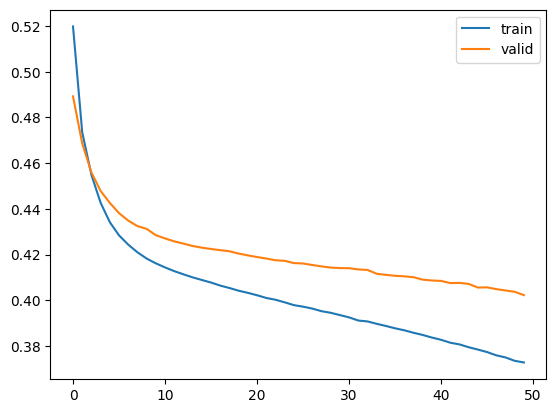

In [66]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_SGD.history)
hist['epoch'] = history_SGD.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model_SGD.evaluate(X_test, y_test)

The validation data is performing well respect the training data. Anyhow, the model tends to overfit.

Let's check the other metrices.

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.232860, G-Mean=0.756


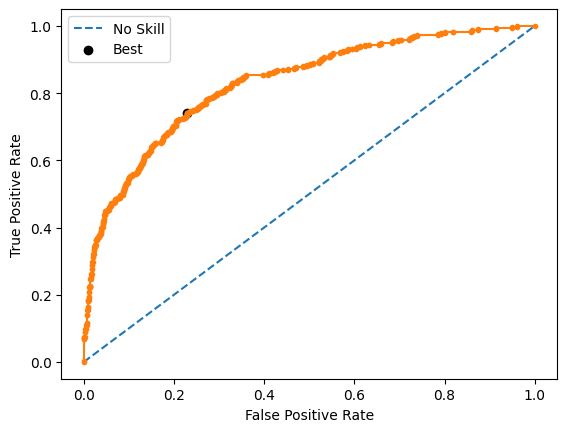

In [67]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat_SGD = model_SGD.predict(X_test)
# keep probabilities for the positive outcome only
yhat_SGD = yhat_SGD[:, 0]
# calculate roc curves
fpr, tpr, thresholds_SGD = roc_curve(y_test, yhat_SGD)
# calculate the g-mean for each threshold
gmeans_SGD = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans_SGD)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds_SGD[ix], gmeans_SGD[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Confusion matrix**

In [68]:
y_pred_SGD=model_SGD.predict(X_test)
y_pred_SGD = (y_pred_SGD > thresholds_SGD[ix])
y_pred_SGD

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

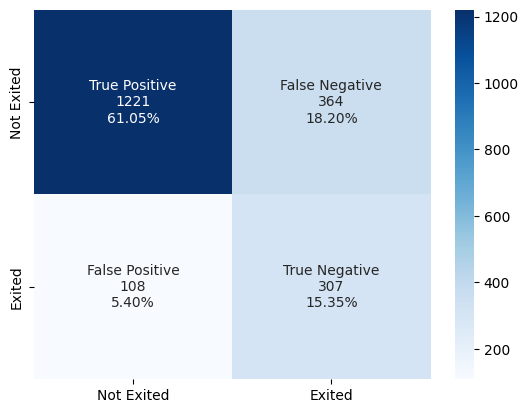

In [69]:
#Calculating the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm_SGD=confusion_matrix(y_test, y_pred_SGD)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm_SGD,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')


In [70]:
#Accuracy as per the classification report
from sklearn import metrics
cr_SGD=metrics.classification_report(y_test,y_pred_SGD)
print(cr_SGD)

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1585
           1       0.46      0.74      0.57       415

    accuracy                           0.76      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.82      0.76      0.78      2000



The above model has:
- A recall of 0.77 for class 0
- A G-mean of 0.756

Let's see if we can improve this value.

### Model Building: Neural Network model with Adam Optimizer

In [71]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [72]:
# Initializing the ANN
model_ADAM = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model_ADAM.add(Dense(activation = 'relu', input_dim = 11, units=64))
#Add 1st hidden layer
model_ADAM.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim.
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model_ADAM.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.001)
model_ADAM.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [73]:
model_ADAM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
history_ADAM=model_ADAM.fit(X_train, y_train,
          validation_data=(X_val,y_val),
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
188/188 [==============================] - 2s 4ms/step - loss: 0.4533 - accuracy: 0.8002 - val_loss: 0.4364 - val_accuracy: 0.8085
Epoch 2/50
188/188 [==============================] - 1s 3ms/step - loss: 0.4150 - accuracy: 0.8227 - val_loss: 0.4231 - val_accuracy: 0.8205
Epoch 3/50
188/188 [==============================] - 1s 3ms/step - loss: 0.4034 - accuracy: 0.8310 - val_loss: 0.4152 - val_accuracy: 0.8210
Epoch 4/50
188/188 [==============================] - 1s 3ms/step - loss: 0.3927 - accuracy: 0.8330 - val_loss: 0.4071 - val_accuracy: 0.8230
Epoch 5/50
188/188 [==============================] - 2s 10ms/step - loss: 0.3822 - accuracy: 0.8380 - val_loss: 0.4058 - val_accuracy: 0.8245
Epoch 6/50
188/188 [==============================] - 2s 11ms/step - loss: 0.3727 - accuracy: 0.8423 - val_loss: 0.3950 - val_accuracy: 0.8255
Epoch 7/50
188/188 [==============================] - 1s 4ms/step - loss: 0.3647 - accuracy: 0.8468 - val_loss: 0.3957 - val_accuracy: 0.8320
Epoc

63/63 [==============================] - 0s 2ms/step - loss: 0.3432 - accuracy: 0.8570


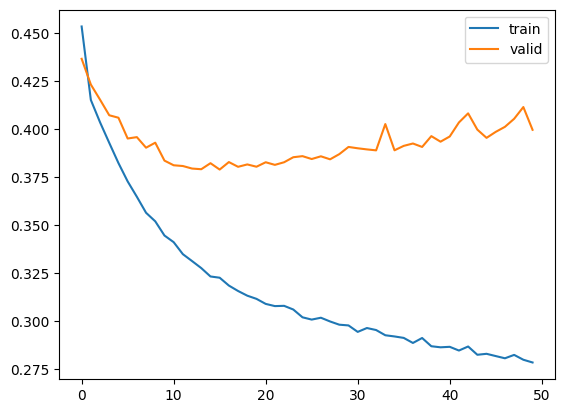

In [75]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_ADAM.history)
hist['epoch'] = history_ADAM.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model_ADAM.evaluate(X_test, y_test)

Here the model seems to be overfitted, as the distance between the train curve and validation curved started increasing.
The earlystop function will be used

In [76]:
# Initializing the ANN
model_ADAM_es = Sequential()
model_ADAM_es.add(Dense(activation = 'relu', input_dim = 11, units=64))
#Add 1st hidden layer
model_ADAM_es.add(Dense(32, activation='relu'))
# We use the sigmoid because we want probability outcomes
model_ADAM_es.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.001)
model_ADAM_es.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [77]:
history_ADAM_es=model_ADAM_es.fit(X_train, y_train,
          validation_data=(X_val,y_val),
          epochs=50,
          batch_size=32,verbose=1, callbacks=[es_cb])

Epoch 1/50
188/188 [==============================] - 1s 4ms/step - loss: 0.4595 - accuracy: 0.7865 - val_loss: 0.4386 - val_accuracy: 0.7970
Epoch 2/50
188/188 [==============================] - 1s 3ms/step - loss: 0.4160 - accuracy: 0.8210 - val_loss: 0.4248 - val_accuracy: 0.8095
Epoch 3/50
188/188 [==============================] - 1s 3ms/step - loss: 0.4015 - accuracy: 0.8333 - val_loss: 0.4188 - val_accuracy: 0.8190
Epoch 4/50
188/188 [==============================] - 1s 3ms/step - loss: 0.3867 - accuracy: 0.8377 - val_loss: 0.4052 - val_accuracy: 0.8235
Epoch 5/50
188/188 [==============================] - 1s 4ms/step - loss: 0.3727 - accuracy: 0.8445 - val_loss: 0.3989 - val_accuracy: 0.8315
Epoch 6/50
188/188 [==============================] - 1s 4ms/step - loss: 0.3609 - accuracy: 0.8488 - val_loss: 0.3892 - val_accuracy: 0.8300
Epoch 7/50
188/188 [==============================] - 1s 7ms/step - loss: 0.3522 - accuracy: 0.8505 - val_loss: 0.3915 - val_accuracy: 0.8355
Epoch 

63/63 [==============================] - 0s 2ms/step - loss: 0.3365 - accuracy: 0.8625


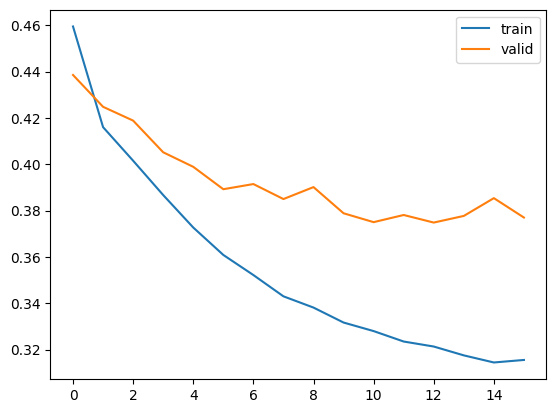

In [78]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_ADAM_es.history)
hist['epoch'] = history_ADAM_es.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model_ADAM_es.evaluate(X_test, y_test)

Even using earlystop to prevent overfitting the train and valid curves tend to overfit.

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.209304, G-Mean=0.783


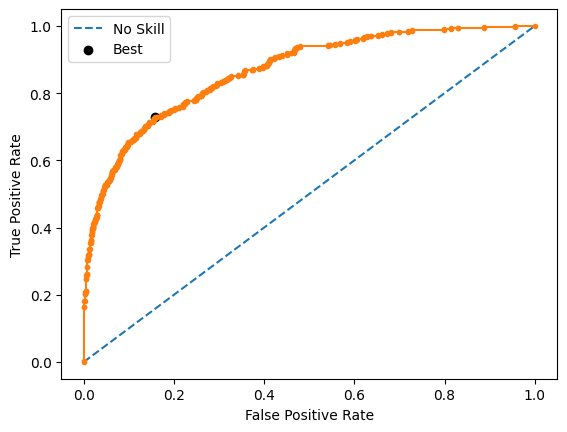

In [79]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat_ADAM = model_ADAM_es.predict(X_test)
# keep probabilities for the positive outcome only
yhat_ADAM = yhat_ADAM[:, 0]
# calculate roc curves
fpr, tpr, thresholds_ADAM = roc_curve(y_test, yhat_ADAM)
# calculate the g-mean for each threshold
gmeans_ADAM = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans_ADAM)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds_ADAM[ix], gmeans_ADAM[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [80]:
#Predicting the results using best as a threshold
y_pred_ADAM=model_ADAM_es.predict(X_test)
y_pred_ADAM = (y_pred_ADAM > thresholds_ADAM[ix])
y_pred_ADAM

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

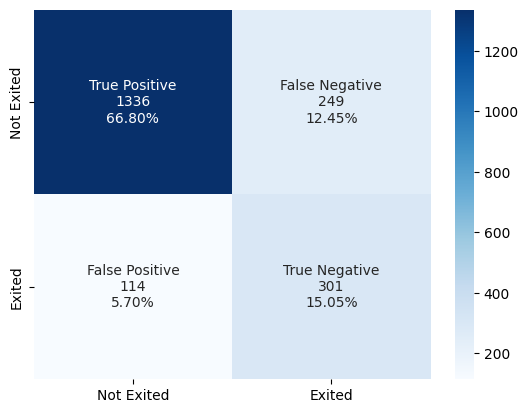

In [81]:
#Calculating the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm_ADAM=confusion_matrix(y_test, y_pred_ADAM)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm_ADAM,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

The false positives got a reduction but the percentage of true positives is less than the percentage obtained for SGD model training.  

In [82]:
#Accuracy as per the classification report
from sklearn import metrics
cr_ADAM=metrics.classification_report(y_test,y_pred_ADAM)
print(cr_ADAM)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1585
           1       0.55      0.73      0.62       415

    accuracy                           0.82      2000
   macro avg       0.73      0.78      0.75      2000
weighted avg       0.84      0.82      0.83      2000



The Adam optimizer model has:
- A recall of 0.84 for class 0
- A G-mean of 0.783

Let's see if we can improve this value.

### Model Improvement: Neural Network model with Dropout

In [83]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [84]:
# Initializing the ANN
model_DOUT = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model_DOUT.add(Dense(activation = 'relu', input_dim = 11, units=64))
model_DOUT.add(Dropout(0.2))
#Add 1st hidden layer
model_DOUT.add(Dense(32, activation='relu'))
model_DOUT.add(Dropout(0.2))
# Adding the output layer
# Notice that we do not need to specify input dim.
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model_DOUT.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.001)
model_DOUT.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [85]:
model_DOUT.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
history_DOUT=model_DOUT.fit(X_train, y_train,
          validation_data=(X_val,y_val),
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
188/188 [==============================] - 2s 4ms/step - loss: 0.4715 - accuracy: 0.7958 - val_loss: 0.4402 - val_accuracy: 0.8000
Epoch 2/50
188/188 [==============================] - 1s 3ms/step - loss: 0.4360 - accuracy: 0.8090 - val_loss: 0.4269 - val_accuracy: 0.8175
Epoch 3/50
188/188 [==============================] - 1s 4ms/step - loss: 0.4252 - accuracy: 0.8205 - val_loss: 0.4231 - val_accuracy: 0.8190
Epoch 4/50
188/188 [==============================] - 1s 4ms/step - loss: 0.4192 - accuracy: 0.8242 - val_loss: 0.4172 - val_accuracy: 0.8235
Epoch 5/50
188/188 [==============================] - 1s 5ms/step - loss: 0.4106 - accuracy: 0.8305 - val_loss: 0.4142 - val_accuracy: 0.8240
Epoch 6/50
188/188 [==============================] - 1s 5ms/step - loss: 0.4063 - accuracy: 0.8270 - val_loss: 0.4086 - val_accuracy: 0.8225
Epoch 7/50
188/188 [==============================] - 1s 4ms/step - loss: 0.4004 - accuracy: 0.8305 - val_loss: 0.4061 - val_accuracy: 0.8280
Epoch 

63/63 [==============================] - 0s 3ms/step - loss: 0.3315 - accuracy: 0.8675


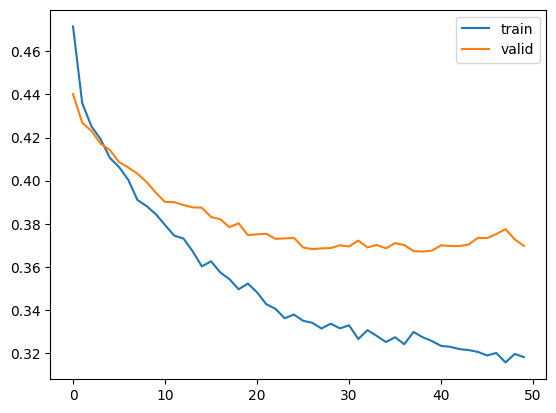

In [87]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_DOUT.history)
hist['epoch'] = history_DOUT.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model_DOUT.evaluate(X_test, y_test)

Here the model seems to be overfitted, as the distance between the train curve and validation curved started increasing.
The earlystop function will be used

In [88]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [89]:
# Initializing the ANN and adding dropout ratio of 0.2
model_DOUT_es = Sequential()
model_DOUT_es.add(Dense(activation = 'relu', input_dim = 11, units=64))
model_DOUT_es.add(Dropout(0.2))
#Add 1st hidden layer
model_DOUT_es.add(Dense(32, activation='relu'))
model_DOUT_es.add(Dropout(0.2))
# Adding the output layer
model_DOUT_es.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.001)
model_DOUT_es.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [90]:
history_DOUT_es=model_DOUT_es.fit(X_train, y_train,
          validation_data=(X_val,y_val),
          epochs=50,
          batch_size=32,verbose=1, callbacks=[es_cb])

Epoch 1/50
188/188 [==============================] - 3s 5ms/step - loss: 0.4715 - accuracy: 0.7958 - val_loss: 0.4402 - val_accuracy: 0.8000
Epoch 2/50
188/188 [==============================] - 1s 3ms/step - loss: 0.4360 - accuracy: 0.8090 - val_loss: 0.4269 - val_accuracy: 0.8175
Epoch 3/50
188/188 [==============================] - 1s 3ms/step - loss: 0.4252 - accuracy: 0.8205 - val_loss: 0.4231 - val_accuracy: 0.8190
Epoch 4/50
188/188 [==============================] - 1s 3ms/step - loss: 0.4192 - accuracy: 0.8242 - val_loss: 0.4172 - val_accuracy: 0.8235
Epoch 5/50
188/188 [==============================] - 1s 3ms/step - loss: 0.4106 - accuracy: 0.8305 - val_loss: 0.4142 - val_accuracy: 0.8240
Epoch 6/50
188/188 [==============================] - 1s 3ms/step - loss: 0.4063 - accuracy: 0.8270 - val_loss: 0.4086 - val_accuracy: 0.8225
Epoch 7/50
188/188 [==============================] - 1s 3ms/step - loss: 0.4004 - accuracy: 0.8305 - val_loss: 0.4061 - val_accuracy: 0.8280
Epoch 

63/63 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8665


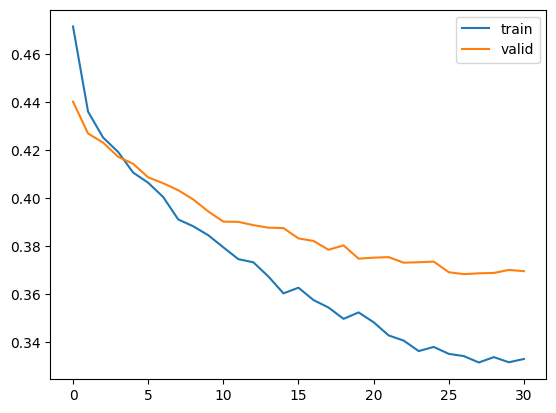

In [91]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_DOUT_es.history)
hist['epoch'] = history_DOUT_es.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model_DOUT_es.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.185381, G-Mean=0.789


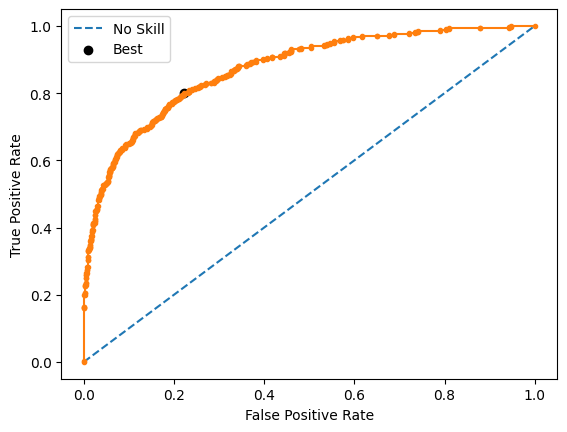

In [92]:
# predict probabilities
yhat_DOUT = model_DOUT_es.predict(X_test)
# keep probabilities for the positive outcome only
yhat_DOUT = yhat_DOUT[:, 0]
# calculate roc curves
fpr, tpr, thresholds_DOUT = roc_curve(y_test, yhat_DOUT)
# calculate the g-mean for each threshold
gmeans_DOUT = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans_DOUT)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds_DOUT[ix], gmeans_DOUT[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [93]:
#Predicting the results using best as a threshold
y_pred_DOUT=model_DOUT_es.predict(X_test)
y_pred_DOUT = (y_pred_DOUT > thresholds_DOUT[ix])
y_pred_DOUT

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

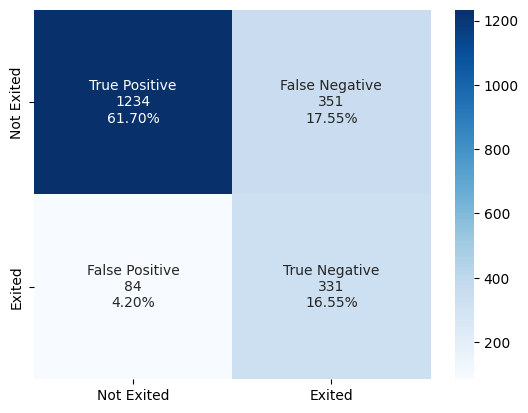

In [94]:
#Calculating the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm_DOUT=confusion_matrix(y_test, y_pred_DOUT)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm_DOUT,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [95]:
#Accuracy as per the classification report
from sklearn import metrics
cr_DOUT=metrics.classification_report(y_test,y_pred_DOUT)
print(cr_DOUT)

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1585
           1       0.49      0.80      0.60       415

    accuracy                           0.78      2000
   macro avg       0.71      0.79      0.73      2000
weighted avg       0.84      0.78      0.80      2000



The Neural Network model with dropout has:
- A recall of 0.78 for class 0
- A G-mean of 0.789

This is the best G-mean so far.

Let's see if we can improve this value.

### Model Improvement: Neural Network model with Hyperparameter tuning

### Model RS with KERAS TUNER
#### **Random Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

#### **Note: I am currently utilizing RandomSearch with Keras Tuner for model tuning. Unfortunately, I am unable to construct GridSearch models due to internal Python issues**

We are using Random search to optimize the following hyperparameters:

- **Number of layers**
- **Learning Rate**
- **Units**
- **Dropout**
- The tuning objective is the validation loss "val_accuracy"
- For academic purposes only 25 trials will be considered

In [96]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [97]:
def build_model(h):
    model = keras.Sequential()
    #let's try 1 to 5 layers
    #let's try units between 32 and 128
    for i in range(h.Int('num_layers', 1, 5)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=128,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    #let's try dropout 0.25
    if h.Boolean("dropout"):
      model.add(layers.Dropout(rate=0.25))
    #let's try learning rate
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-1, 1e-2, 1e-3])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [98]:
tuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    # Let's use 15 trials
    max_trials=25,
    executions_per_trial=1,
    project_name='Job_',
)
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
dropout (Boolean)
{'default': False, 'conditions': []}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001], 'ordered': True}


In [100]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=15,
             validation_split = 0.2)

Trial 25 Complete [00h 00m 12s]
val_accuracy: 0.8450000286102295

Best val_accuracy So Far: 0.8633333444595337
Total elapsed time: 00h 04m 34s


In [101]:
## Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in ./Job_
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 00 summary
Hyperparameters:
num_layers: 5
units_0: 128
dropout: False
learning_rate: 0.01
units_1: 32
units_2: 32
units_3: 32
units_4: 32
Score: 0.8633333444595337

Trial 04 summary
Hyperparameters:
num_layers: 2
units_0: 64
dropout: False
learning_rate: 0.001
units_1: 128
units_2: 96
units_3: 96
units_4: 128
Score: 0.8616666793823242

Trial 14 summary
Hyperparameters:
num_layers: 2
units_0: 64
dropout: False
learning_rate: 0.01
units_1: 96
units_2: 96
units_3: 96
units_4: 96
Score: 0.8608333468437195

Trial 08 summary
Hyperparameters:
num_layers: 4
units_0: 32
dropout: False
learning_rate: 0.01
units_1: 64
units_2: 64
units_3: 96
units_4: 128
Score: 0.8600000143051147

Trial 23 summary
Hyperparameters:
num_layers: 3
units_0: 96
dropout: False
learning_rate: 0.001
units_1: 64
units_2: 32
units_3: 96
units_4: 32
Score: 0.85916668176651

Trial 20 summary
Hyperparameters:
num_la

Let's create the a model with the best mentioned configuration:
- Layers = 5
- units_0 = 128
- units_1 = 32
- units_2 = 32
- units_3 = 32
- units_4 = 32
- Dropout = False
- lr = 0.01

In [102]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [103]:
model_RS = Sequential()
model_RS.add(Dense(128,activation='relu',input_dim = 11))
model_RS.add(Dense(32,activation='relu'))
model_RS.add(Dense(32,activation='relu'))
model_RS.add(Dense(32,activation='relu'))
model_RS.add(Dense(32,activation='relu'))
model_RS.add(Dense(1, activation = 'sigmoid'))
model_RS.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8865 (34.63 KB)
Trainable params: 8865 (34

In [105]:
optimizer = tf.keras.optimizers.Adam(0.01)
model_RS.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [106]:
history_RS = model_RS.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_data=(X_val,y_val), callbacks=[es_cb])

Epoch 1/50
94/94 [==============================] - 3s 10ms/step - loss: 0.4476 - accuracy: 0.7972 - val_loss: 0.4312 - val_accuracy: 0.8055
Epoch 2/50
94/94 [==============================] - 0s 3ms/step - loss: 0.4022 - accuracy: 0.8335 - val_loss: 0.4532 - val_accuracy: 0.8205
Epoch 3/50
94/94 [==============================] - 0s 3ms/step - loss: 0.3907 - accuracy: 0.8423 - val_loss: 0.4066 - val_accuracy: 0.8300
Epoch 4/50
94/94 [==============================] - 0s 3ms/step - loss: 0.3721 - accuracy: 0.8485 - val_loss: 0.3951 - val_accuracy: 0.8395
Epoch 5/50
94/94 [==============================] - 0s 3ms/step - loss: 0.3509 - accuracy: 0.8557 - val_loss: 0.3904 - val_accuracy: 0.8350
Epoch 6/50
94/94 [==============================] - 0s 4ms/step - loss: 0.3457 - accuracy: 0.8588 - val_loss: 0.3842 - val_accuracy: 0.8380
Epoch 7/50
94/94 [==============================] - 0s 3ms/step - loss: 0.3373 - accuracy: 0.8645 - val_loss: 0.3824 - val_accuracy: 0.8450
Epoch 8/50
94/94 [=

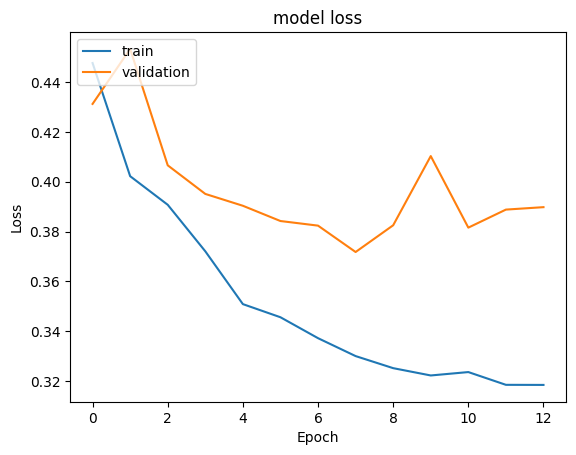

In [107]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_RS.history['loss'])
plt.plot(history_RS.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

There is no to much improvement respect the previous models, and we start to see noise in the model.

63/63 [==============================] - 1s 5ms/step
Best Threshold=0.182585, G-Mean=0.782


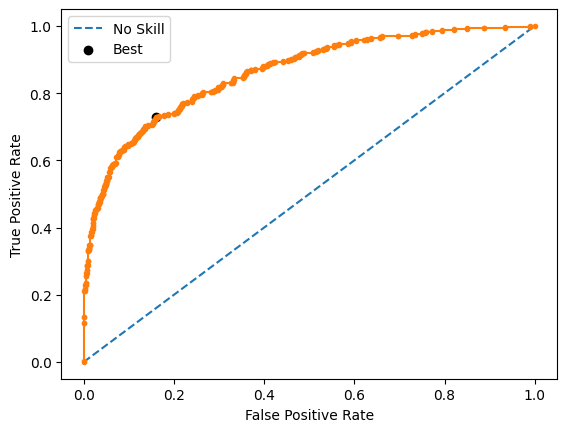

In [108]:
# predict probabilities
yhat_RS = model_RS.predict(X_test)
# keep probabilities for the positive outcome only
yhat_RS = yhat_RS[:, 0]
# calculate roc curves
fpr, tpr, thresholds_RS = roc_curve(y_test, yhat_RS)
# calculate the g-mean for each threshold
gmeans_RS = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans_RS)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds_RS[ix], gmeans_RS[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [109]:
y_pred_RS=model_RS.predict(X_test)
y_pred_RS = (y_pred_RS > thresholds_RS[ix])
y_pred_RS

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

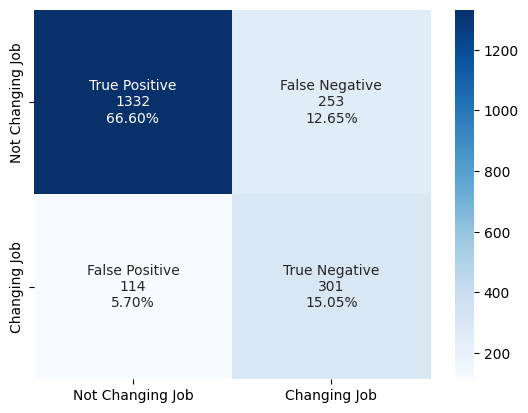

In [110]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm_RS=confusion_matrix(y_test, y_pred_RS)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm_RS,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [111]:
#Accuracy as per the classification report
from sklearn import metrics
cr_RS=metrics.classification_report(y_test,y_pred_RS)
print(cr_RS)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1585
           1       0.54      0.73      0.62       415

    accuracy                           0.82      2000
   macro avg       0.73      0.78      0.75      2000
weighted avg       0.84      0.82      0.83      2000



The Random Search with Keras tuning model has:
- A recall of 0.84 for class 0
- A G-mean of 0.782

### Model Improvement: Neural Network model with balanced data

### SMOTE + Keras Tuner

In [112]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))


Before Oversampling, counts of label 'Yes': 1207
Before Oversampling, counts of label 'No': 4793 



In [113]:
print("After Oversampling, counts of label 'Yes': {}".format(sum(y_sm == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_sm == 0)))

After Oversampling, counts of label 'Yes': 4793
After Oversampling, counts of label 'No': 4793 



In [114]:
print("After Oversampling, the shape of train_X: {}".format(X_sm.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_sm.shape))

After Oversampling, the shape of train_X: (9586, 11)
After Oversampling, the shape of train_y: (9586,) 



We are using Random search to optimize the following hyperparameters:

- **Number of layers**
- **Learning Rate**
- **Units**

**Build a model with the balanced dataset**

In [115]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [116]:
def build_model_2(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 1, 5)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=128,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-1, 1e-2, 1e-3])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [117]:
tuner_2 = RandomSearch(
    build_model_2,
    objective='val_accuracy',
    max_trials=15,
    executions_per_trial=1,
    project_name='Job_Switch')

In [118]:
tuner_2.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001], 'ordered': True}


In [119]:
tuner_2.search(X_sm, y_sm,
             epochs=15,
             validation_data=(X_val,y_val))

Trial 15 Complete [00h 00m 17s]
val_accuracy: 0.8025000095367432

Best val_accuracy So Far: 0.8230000138282776
Total elapsed time: 00h 05m 33s


In [120]:
tuner_2.results_summary()

Results summary
Results in ./Job_Switch
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 07 summary
Hyperparameters:
num_layers: 2
units_0: 64
learning_rate: 0.1
units_1: 128
units_2: 96
units_3: 32
units_4: 128
Score: 0.8230000138282776

Trial 02 summary
Hyperparameters:
num_layers: 4
units_0: 32
learning_rate: 0.01
units_1: 32
units_2: 32
units_3: 128
units_4: 96
Score: 0.8144999742507935

Trial 03 summary
Hyperparameters:
num_layers: 1
units_0: 64
learning_rate: 0.01
units_1: 32
units_2: 128
units_3: 32
units_4: 128
Score: 0.8140000104904175

Trial 04 summary
Hyperparameters:
num_layers: 2
units_0: 96
learning_rate: 0.01
units_1: 32
units_2: 32
units_3: 64
units_4: 64
Score: 0.8090000152587891

Trial 12 summary
Hyperparameters:
num_layers: 1
units_0: 32
learning_rate: 0.1
units_1: 32
units_2: 64
units_3: 32
units_4: 64
Score: 0.8059999942779541

Trial 14 summary
Hyperparameters:
num_layers: 2
units_0: 64
learning_rate: 0.01
units_1: 32
units_2: 64
units_

Let's try a model with the best hyperparameters obtained

- Layers = 2
- units_0 = 64
- units_1 = 128
- lr = 0.1

In [121]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [122]:
model_sm = Sequential()
model_sm.add(Dense(64,activation='relu',input_dim = 11))
model_sm.add(Dense(128,activation='relu'))
model_sm.add(Dense(1, activation = 'sigmoid'))
model_sm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9217 (36.00 KB)
Trainable params: 9217 (36.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [123]:
optimizer = tf.keras.optimizers.Adam(0.1)
model_sm.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [124]:
history_sm = model_sm.fit(X_sm,y_sm,batch_size=64,epochs=50,verbose=1,validation_split = 0.2, callbacks=[es_cb])

Epoch 1/50
120/120 [==============================] - 1s 4ms/step - loss: 0.6236 - accuracy: 0.7053 - val_loss: 0.5676 - val_accuracy: 0.7033
Epoch 2/50
120/120 [==============================] - 0s 3ms/step - loss: 0.5198 - accuracy: 0.7396 - val_loss: 0.6273 - val_accuracy: 0.5980
Epoch 3/50
120/120 [==============================] - 0s 3ms/step - loss: 0.4978 - accuracy: 0.7510 - val_loss: 0.6336 - val_accuracy: 0.5610
Epoch 4/50
120/120 [==============================] - 0s 3ms/step - loss: 0.4910 - accuracy: 0.7593 - val_loss: 0.5730 - val_accuracy: 0.8446
Epoch 5/50
120/120 [==============================] - 0s 3ms/step - loss: 0.4758 - accuracy: 0.7715 - val_loss: 0.7378 - val_accuracy: 0.5735
Epoch 6/50
120/120 [==============================] - 0s 3ms/step - loss: 0.4547 - accuracy: 0.7872 - val_loss: 0.5512 - val_accuracy: 0.6413
Epoch 7/50
120/120 [==============================] - 0s 3ms/step - loss: 0.4560 - accuracy: 0.7891 - val_loss: 0.5702 - val_accuracy: 0.7555
Epoch 

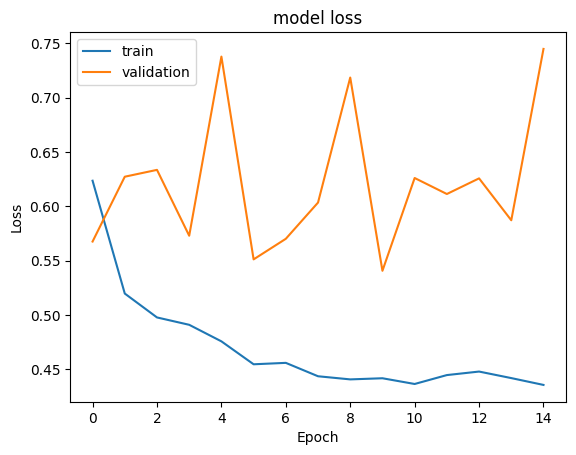

In [125]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_sm.history['loss'])
plt.plot(history_sm.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

The balance strategy produced a lot of noise in the model

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.294537, G-Mean=0.761


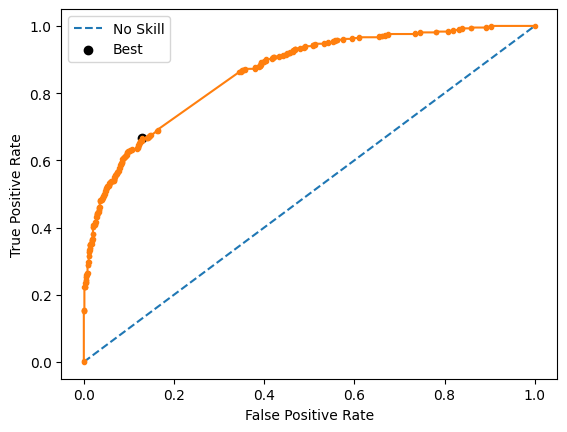

In [126]:
# predict probabilities
yhat_sm = model_sm.predict(X_test)
# keep probabilities for the positive outcome only
yhat_sm = yhat_sm[:, 0]
# calculate roc curves
fpr, tpr, thresholds_sm = roc_curve(y_test, yhat_sm)
# calculate the g-mean for each threshold
gmeans_sm = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans_sm)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds_sm[ix], gmeans_sm[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [127]:
y_pred_sm=model_sm.predict(X_test)
y_pred_sm = (y_pred_sm > thresholds_sm[ix])
y_pred_sm

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

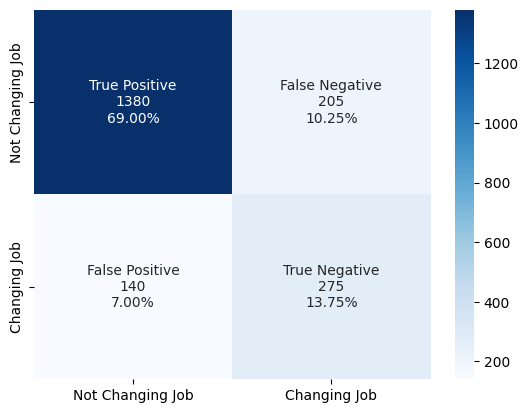

In [128]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm_sm=confusion_matrix(y_test, y_pred_sm)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm_sm,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [129]:
#Accuracy as per the classification report
from sklearn import metrics
cr_sm=metrics.classification_report(y_test,y_pred_sm)
print(cr_sm)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1585
           1       0.57      0.66      0.61       415

    accuracy                           0.83      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.84      0.83      0.83      2000



Oversampling using smote did not help improve the recall score.

The balanced model has:
- A recall of 0.87 for class 0
- A G-mean of 0.761


## Final Model

- The Neural Network Model with Dropout has the highest G-mean value ~79%
- The Adam optimizer model has the highest Racall value ~0.84%,
- Based on the previous values, and considering the G-mean as a driver, our final model can be the **Neural Network Model with Droput**.

## Actionable Insights and Recommendations

### Suggested Areas of Improvement

* Build any one Machine Learning model, and use that to get the feature importance of the variables. Try to use that in the neural network model.


**What recommedations would you suggest to the bank?**

* Following a comprehensive analysis of various deep learning models to predict customer account closure, the neural network with dropout emerged as the most promising, achieving a G-mean value of 0.79 and a recall of 0.78.
* The bank can deploy the final model from this exercise to identify with a reasonable degree of accuracy whether an customer is likely to close the account or not, and this process seems to be easier and more time-efficient than other methods.
* Investigate customer engagement metrics for accounts predicted as potential closures.
* Tailor targeted engagement strategies to retain at-risk customers, utilizing personalized communication and incentives.
* Incorporate a human-in-the-loop validation mechanism to ensure model predictions align with the bank's domain expertise.
* Allow domain experts to validate and provide feedback on model predictions regularly.

___